In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from quantum_systems import OneDimensionalHarmonicOscillator
from configuration_interaction import CIS, CID, CISD

In [2]:
n = 2
l = 12

radius = 10
num_grid_points = 201
omega = 0.25
mass = 1

odho = OneDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
odho.setup_system()

odho.change_to_hf_basis(tolerance=1e-6, verbose=True)

HF converged to given precision in 21 iterations
Ehf: (1.1795911655882738+0j)


In [3]:
cis = CIS(odho, brute_force=False, verbose=True, np=np)
cis.setup_ci_space()

Number of states to create: 21
Size of a state in bytes: 8
Time spent setting up CIS space: 0.4221987724304199 sec


In [4]:
cis.compute_ground_state()

Time spent constructing Hamiltonian: 4.066396236419678 sec
Time spent diagonalizing Hamiltonian: 0.0005016326904296875 sec


In [5]:
print("CIS ground state energy: {0}".format(cis.energies[0]))

CIS ground state energy: 0.8603180942793398


In [6]:
rho_cis = cis.compute_particle_density()

Time spent computing one-body matrix: 0.0031566619873046875 sec


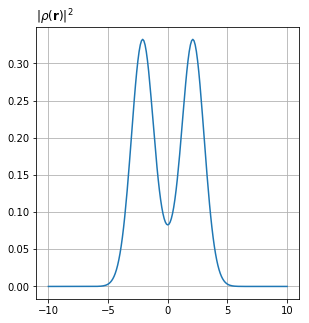

In [7]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.plot(odho.grid, np.abs(rho_cis * rho_cis.conj()))
plt.grid()

In [8]:
cid = CID(odho, brute_force=False, verbose=True, np=np)
cid.setup_ci_space()

Number of states to create: 46
Size of a state in bytes: 8
Time spent setting up CID space: 0.2317512035369873 sec


In [9]:
cid.compute_ground_state()

Time spent constructing Hamiltonian: 0.0009150505065917969 sec
Time spent diagonalizing Hamiltonian: 0.003956317901611328 sec


In [10]:
print("CID ground state energy: {0}".format(cid.energies[0]))

CID ground state energy: 0.8399421618469782


In [11]:
rho_cid = cid.compute_particle_density()

Time spent computing one-body matrix: 0.008168697357177734 sec


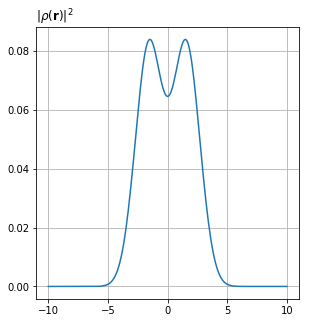

In [12]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.plot(odho.grid, np.abs(rho_cid * rho_cid.conj()))
plt.grid()

In [13]:
cisd = CISD(odho, brute_force=False, verbose=True, np=np)
cisd.setup_ci_space()

Number of states to create: 66
Size of a state in bytes: 8
Time spent setting up CISD space: 0.0013659000396728516 sec


In [14]:
cisd.compute_ground_state()

Time spent constructing Hamiltonian: 0.0014650821685791016 sec
Time spent diagonalizing Hamiltonian: 0.0007395744323730469 sec


In [15]:
print("CISD ground state energy: {0}".format(cisd.energies[0]))

CISD ground state energy: 0.8258351144820146


In [16]:
rho_cisd = cisd.compute_particle_density()

Time spent computing one-body matrix: 0.014139890670776367 sec


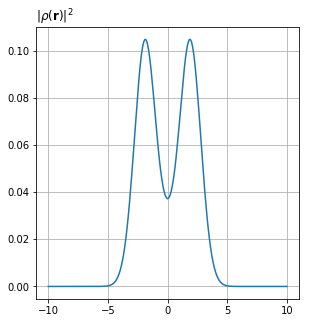

In [17]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.plot(odho.grid, np.abs(rho_cisd)**2)
plt.grid()